In [9]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import pymongo
import networkx as nx
%matplotlib inline

In [10]:
eTypes = {0: 'Email', 1: 'Phone', 2:'Sell', 3:'Buy', 4: 'Author-of', 5:'Financial (income, expenditure)', 6:'Travels-to'}
cmap = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
df =  pd.read_csv('../data/CGCS-Template.csv')

def create_graph_without_financial(collection):
    G = nx.Graph()
    for i in range(len(df)):
        if(df.loc[i]['eType']!=5):
            G.add_edge(df.loc[i]['Source'], df.loc[i]['Target'], color=cmap[int(df.loc[i]['eType'])])
    return G

In [11]:
from matplotlib.lines import Line2D
def plot_graph_without_financial(collection):
    G = create_graph_without_financial(collection)
    pos = nx.spring_layout(G, seed=1, k = 20, iterations=1000)
    # pos = nx.circular_layout(G)
    edges = G.edges(data=True)
    colors = [d['color'] for u,v,d in edges]
    plt.figure(figsize=(20, 10))
    edges = nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=10, edge_color=colors, alpha=0.3)
    nodes = nx.draw_networkx_nodes(G, pos, node_color='blue')
    
    ax = plt.gca()
    custom_lines = [Line2D([0], [0], color=c, lw=4) for c in cmap]
    ax.legend(custom_lines, list(eTypes.values()))

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \


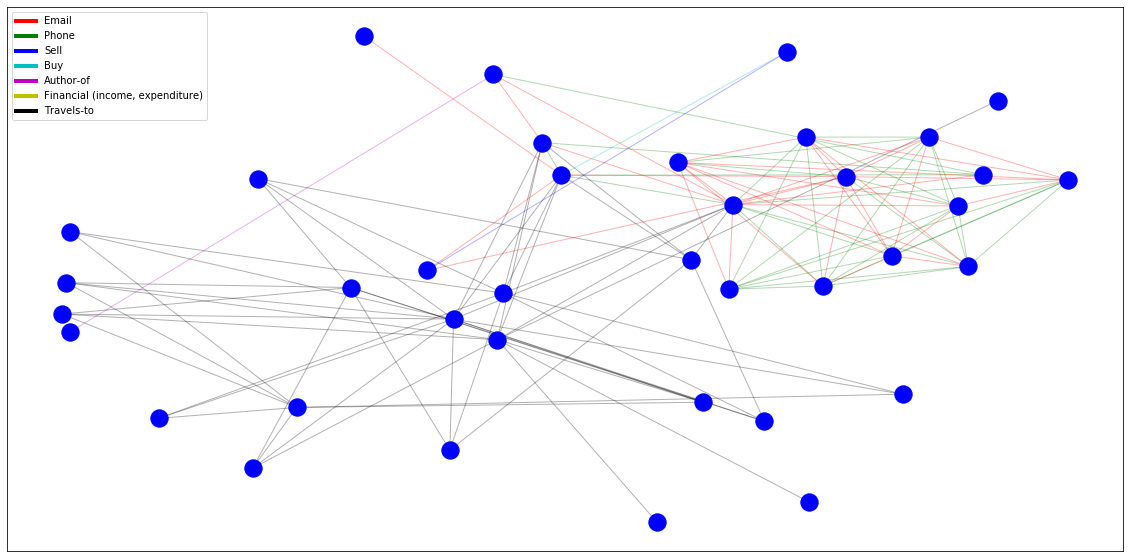

In [12]:
plot_graph_without_financial(df)

In [13]:
G = create_graph_without_financial(df)
nx.diameter(G)

5

In [14]:
# Load Data From CSV File
attributes = pd.read_csv('../data/CGCS-GraphData.csv')
attributes.describe()

,Source,eType,Target,Time,Weight,SourceLocation,TargetLocation,SourceLatitude,SourceLongitude,TargetLatitude,TargetLongitude
count,1.238953e+08,1.238953e+08,1.238953e+08,1.238953e+08,1.238953e+08,7.215359e+07,7.215359e+07,7.215359e+07,7.215359e+07,7.215359e+07,7.215359e+07
mean,5.566990e+05,7.490687e-01,5.571470e+05,1.505715e+07,6.460121e+01,2.400772e+00,2.405289e+00,5.936289e-01,-3.621679e+01,6.262336e-01,-3.643658e+01
std,5.794484e+04,9.638940e-01,5.799030e+04,3.047018e+07,2.870352e+03,1.766937e+00,1.769288e+00,2.391271e+01,1.080029e+02,2.387852e+01,1.081189e+02
min,4.567590e+05,0.000000e+00,4.567590e+05,-2.702016e+09,-1.000000e+00,0.000000e+00,0.000000e+00,-3.789420e+01,-1.793750e+02,-3.789420e+01,-1.793750e+02
25%,5.066630e+05,0.000000e+00,5.071510e+05,8.212526e+06,1.000000e+00,1.000000e+00,1.000000e+00,-2.441490e+01,-1.584460e+02,-2.440350e+01,-1.588930e+02
50%,5.566020e+05,1.000000e+00,5.574750e+05,1.619336e+07,1.000000e+00,2.000000e+00,2.000000e+00,3.914150e-01,-4.081200e+01,4.157700e-01,-4.082980e+01
75%,6.065080e+05,1.000000e+00,6.073850e+05,2.410743e+07,1.000000e+00,4.000000e+00,4.000000e+00,2.379140e+01,8.754490e+01,2.374010e+01,8.736400e+01
max,6.576680e+05,6.000000e+00,6.576700e+05,3.153600e+07,8.166740e+06,5.000000e+00,5.000000e+00,4.983240e+01,1.633690e+02,4.983240e+01,1.633690e+02


In [15]:
attributes.head()

,Source,eType,Target,Time,Weight,SourceLocation,TargetLocation,SourceLatitude,SourceLongitude,TargetLatitude,TargetLongitude
0,639754,4,643327,-132048000,0.250000,NaN,NaN,NaN,NaN,NaN,NaN
1,603100,4,643327,-132048000,0.250000,NaN,NaN,NaN,NaN,NaN,NaN
2,577847,4,643327,-132048000,0.250000,NaN,NaN,NaN,NaN,NaN,NaN
3,466246,4,643327,-132048000,0.250000,NaN,NaN,NaN,NaN,NaN,NaN
4,633499,4,549896,-315561600,0.142857,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123895261 entries, 0 to 123895260
Data columns (total 11 columns):
Source             int64
eType              int64
Target             int64
Time               int64
Weight             float64
SourceLocation     float64
TargetLocation     float64
SourceLatitude     float64
SourceLongitude    float64
TargetLatitude     float64
TargetLongitude    float64
dtypes: float64(7), int64(4)
memory usage: 10.2 GB


In [17]:
no_financial = attributes.loc[attributes.eType != 5]

In [18]:
sourceUnique = no_financial.Source.unique().tolist()
sourceUnique[0:5]

[639754, 603100, 577847, 466246, 633499]

In [19]:
targetUnique = no_financial.Target.unique().tolist()
targetUnique[0:5]

[643327, 549896, 585738, 495590, 534696]

In [36]:
no_financial.head()

,Source,eType,Target,Time,Weight,SourceLocation,TargetLocation,SourceLatitude,SourceLongitude,TargetLatitude,TargetLongitude
0,639754,4,643327,-132048000,0.250000,NaN,NaN,NaN,NaN,NaN,NaN
1,603100,4,643327,-132048000,0.250000,NaN,NaN,NaN,NaN,NaN,NaN
2,577847,4,643327,-132048000,0.250000,NaN,NaN,NaN,NaN,NaN,NaN
3,466246,4,643327,-132048000,0.250000,NaN,NaN,NaN,NaN,NaN,NaN
4,633499,4,549896,-315561600,0.142857,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
from itertools import groupby
import json

graph = {}
for source in sourceUnique:
    selected = no_financial.loc[no_financial['Source'] == source]
    graph[source] = set(list(selected.Target))
for target in targetUnique:
    selected = no_financial.loc[no_financial['Target'] == target]
    if target not in graph:
        graph[target] = set(list(selected.Source))
    else:
        graph[target] = set(list(graph[target]) + list(selected.Source))

In [43]:
out = dict(itertools.islice(graph.items(), 4))
out

{639754: {643327},
 603100: {457509,
  459970,
  460003,
  460326,
  461506,
  462896,
  462954,
  464364,
  465586,
  466813,
  467042,
  467646,
  468142,
  469904,
  470042,
  472295,
  472809,
  474051,
  476723,
  478675,
  480079,
  480131,
  480453,
  483903,
  485788,
  485834,
  486236,
  486379,
  487599,
  489275,
  491152,
  491773,
  493143,
  495590,
  502534,
  503180,
  504811,
  505025,
  510166,
  511595,
  513353,
  513862,
  514179,
  514563,
  519134,
  519907,
  521266,
  521664,
  523834,
  531177,
  531507,
  534696,
  535591,
  536160,
  536558,
  538232,
  538363,
  541567,
  542132,
  544551,
  549896,
  550161,
  552518,
  556237,
  557930,
  561477,
  562020,
  562025,
  563021,
  564746,
  565463,
  567308,
  567454,
  569354,
  569527,
  572255,
  572837,
  575215,
  575985,
  577164,
  578789,
  579887,
  580157,
  581455,
  585131,
  585738,
  590065,
  590130,
  590152,
  594859,
  598609,
  599753,
  600172,
  604782,
  605765,
  606799,
  607254,
  6

In [45]:
!pip install jsonpickle

In [46]:
import jsonpickle

file = open("../data/reducedData.txt","w") 
 
file.write(jsonpickle.encode(graph)) 

1805734752

In [47]:
import json

with open('../data/reducedData.txt') as f:
    adjacent = json.load(f)
adjacent

{'639754': {'py/set': [643327]},
 '603100': {'py/set': [514563,
   613893,
   549896,
   617480,
   585738,
   569354,
   567308,
   564746,
   607254,
   470042,
   620066,
   460326,
   535591,
   462896,
   639025,
   521266,
   531507,
   638004,
   476723,
   523834,
   580157,
   483903,
   654401,
   605765,
   552518,
   606799,
   598609,
   652882,
   493143,
   652894,
   536160,
   467042,
   462954,
   511595,
   600172,
   629867,
   604782,
   538232,
   514179,
   577164,
   491152,
   567454,
   638113,
   534696,
   468142,
   487599,
   642737,
   465586,
   569527,
   467646,
   505025,
   459970,
   461506,
   480453,
   599753,
   656076,
   556237,
   510166,
   565463,
   460003,
   519907,
   578789,
   472295,
   472809,
   531177,
   575215,
   590065,
   622842,
   538363,
   491773,
   643327,
   628482,
   625924,
   502534,
   550161,
   457509,
   544551,
   579887,
   590130,
   652084,
   653624,
   628539,
   489275,
   561477,
   513862,
   590152,
 

In [48]:
adjacent['639754']['py/set']

[643327]

In [49]:
graph = {}
for item in adjacent:
    graph[int(item)] = adjacent[item]['py/set']
graph

{639754: [643327],
 603100: [514563,
  613893,
  549896,
  617480,
  585738,
  569354,
  567308,
  564746,
  607254,
  470042,
  620066,
  460326,
  535591,
  462896,
  639025,
  521266,
  531507,
  638004,
  476723,
  523834,
  580157,
  483903,
  654401,
  605765,
  552518,
  606799,
  598609,
  652882,
  493143,
  652894,
  536160,
  467042,
  462954,
  511595,
  600172,
  629867,
  604782,
  538232,
  514179,
  577164,
  491152,
  567454,
  638113,
  534696,
  468142,
  487599,
  642737,
  465586,
  569527,
  467646,
  505025,
  459970,
  461506,
  480453,
  599753,
  656076,
  556237,
  510166,
  565463,
  460003,
  519907,
  578789,
  472295,
  472809,
  531177,
  575215,
  590065,
  622842,
  538363,
  491773,
  643327,
  628482,
  625924,
  502534,
  550161,
  457509,
  544551,
  579887,
  590130,
  652084,
  653624,
  628539,
  489275,
  561477,
  513862,
  590152,
  513353,
  563021,
  480079,
  581455,
  619347,
  655707,
  486236,
  572255,
  562020,
  562025,
  557930,
  6

In [2]:
import pickle
with open('big_adj_graph.pickle', 'rb') as f:
    graph = pickle.load(f)

In [6]:
graph[473043]

[539232,
 566476,
 565073,
 538771,
 652020,
 491573,
 544629,
 546487,
 652440,
 591742,
 585791]

In [53]:
def bfs(graph, start, end, radius):
    distinct = {start, end}
    # push the first path into the queue
    for i in range(1, radius+1):
        if i==1:
            level_i = [start, end]
        level_i_1 = []
        while level_i:
            node = level_i.pop(0)
            node_neighbors = set(list(graph.get(node, [])))
            if node_neighbors:
                diff = node_neighbors - distinct
                level_i_1 += list(diff)
        distinct = set(list(distinct) + level_i_1)
        level_i = level_i_1
    return distinct

In [55]:
seed2 = bfs(graph, 538771, 473043, 5)

In [56]:
with open('seed2.pickle', 'wb') as f:
    pickle.dump(seed2, f)

In [58]:
len(graph.keys())

200831

In [62]:
len(seed2)

134323